##**Project Introduction:**

**Our project, titled "Skincare Sentiment Analysis for Dermalogica," employs Natural Language Processing (NLP) techniques to analyze a dataset of Ulta Skincare Reviews for Dermalogica products, scraped on March 27, 2023. The primary goal is to understand the overall sentiment associated with each product, providing valuable insights for product enhancement and customer satisfaction. The analysis covers aspects such as verified buyer status, review distribution, positive keywords, common skincare concerns, product types, upvotes/downvotes correlation, and a machine learning model evaluation. The project aims to empower Dermalogica in making data-driven decisions for continual product improvement.**

**Agenda:**

1. **Introduction to the Project: Highlight the significance of sentiment analysis in skincare and its impact on product development and customer engagement.**

2. **Dataset Overview: Present key attributes of the dataset, including review text, verified buyer status, and product details.**

3. **Project Goals: Outline the primary objectives, including gauging overall sentiment, identifying common skincare concerns, and exploring correlations within the data.**

4. **Buyer Verification Imbalance: Discuss the observed imbalance in buyer verification status and its implications for review authenticity.**

5. **Product Review Distribution: Present the distribution of reviews across Dermalogica products, emphasizing variations in review counts.**

6. **Positive Keywords and Skincare Concerns:** Explore positive keywords and common skincare concerns extracted from customer reviews.

7. **Product Types Mentioned: Highlight the variety of product types mentioned in the reviews and their implications for product diversification.**

8. **Upvotes and Downvotes Correlation: Discuss the correlation patterns between upvotes and downvotes, revealing insights into customer sentiment.**

9. **Initial Model Evaluation: Provide an overview of the initial sentiment analysis model, showcasing its impressive overall accuracy and challenges faced.**

#**Project Name : Ulta Skincare Reviews**

##**Problem Statement**

**Skincare brands, especially Dermalogica, heavily rely on customer reviews to understand product performance and consumer sentiments. The objective is to employ Natural Language Processing (NLP) techniques to analyze a dataset of Ulta Skincare Reviews, scraped on March 27, 2023, for Dermalogica products. The dataset encompasses various attributes, including review text, verified buyer status, and product details.**

**Our primary goal is to gauge the overall sentiment associated with each product, deciphering whether customer reviews predominantly express positivity, negativity, or neutrality. Additionally, the analysis aims to unveil common skincare issues reported by customers, highlighting areas where products excel or may require improvement.**

**Through inferential statistics, we seek to explore potential significant differences in sentiment scores among different Dermalogica products. The analysis will extend to examining correlations between sentiment scores and other variables, such as verified buyer status and upvotes/downvotes.**

**Data visualization techniques, including word clouds and bar plots, will be employed to present key words and phrases associated with positive and negative sentiments. The outcomes are expected to provide actionable insights for product enhancement, marketing strategies, and a deeper understanding of customer satisfaction in the realm of skincare products.**

##**Data Description:**

*   **Review Title: The title of the review.**

*   **Review_Text: The full text of the review.**

*   **Verified_Buyer: Whether the reviewer is a verified buyer of the product.**

*   **Review_Date: The date the review was published relative to the review scrape date.**

*   **Review_Location: The location of the reviewer.**

*   **Review_Upvotes: How many times the review was upvoted by other reviewers.**

*   **Review_Downvotes: How many times the review was downvoted by other reviewers.**

*   **Product: The name of the product the review was issued for.**

*   **Brand: The brand of the product.**

*   **Scrape Date: The date the data was pulled from the web.**

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from textblob import TextBlob
from nltk.corpus import stopwords
import re
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/project/models/All model and dataset/Skincare/Ulta Skincare Reviews.csv')

In [ ]:
df.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,This exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review_Title      4150 non-null   object
 1   Review_Text       4148 non-null   object
 2   Verified_Buyer    4150 non-null   object
 3   Review_Date       4150 non-null   object
 4   Review_Location   4149 non-null   object
 5   Review_Upvotes    4150 non-null   int64 
 6   Review_Downvotes  4150 non-null   int64 
 7   Product           4150 non-null   object
 8   Brand             4150 non-null   object
 9   Scrape_Date       4150 non-null   object
dtypes: int64(2), object(8)
memory usage: 324.3+ KB


In [ ]:
df.isnull().sum()

Review_Title        0
Review_Text         2
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

In [ ]:
# Fill missing values in numeric columns with mean
df['Review_Text'].fillna(df['Review_Text'].mode()[0], inplace=True)
df['Review_Location'].fillna(df['Review_Location'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

Review_Title        0
Review_Text         0
Verified_Buyer      0
Review_Date         0
Review_Location     0
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

##**EDA**

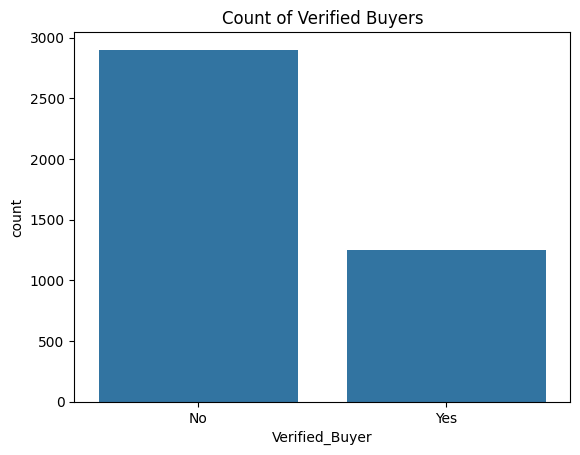

In [ ]:
# Countplot for Verified Buyer
sns.countplot(x='Verified_Buyer', data=df)
plt.title('Count of Verified Buyers')
plt.show()


*   **There are more buyers who are not verified than buyers who are verified.**


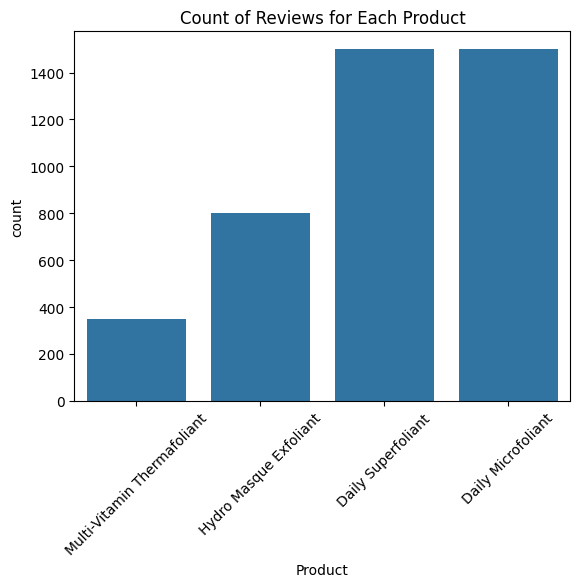

In [ ]:
# Countplot for Product
sns.countplot(x='Product', data=df)
plt.title('Count of Reviews for Each Product')
plt.xticks(rotation=45)
plt.show()

*   **The Daily Superfoliant has the most reviews, with approximately 1200 reviews.**

*   **The Multi-Vitamin Thermafoliant and Hydro Masque Exfoliant have a similar number of reviews, around 800-900 each.**

*   **The Daily Microfoliant has the fewest reviews, with only about 400.**

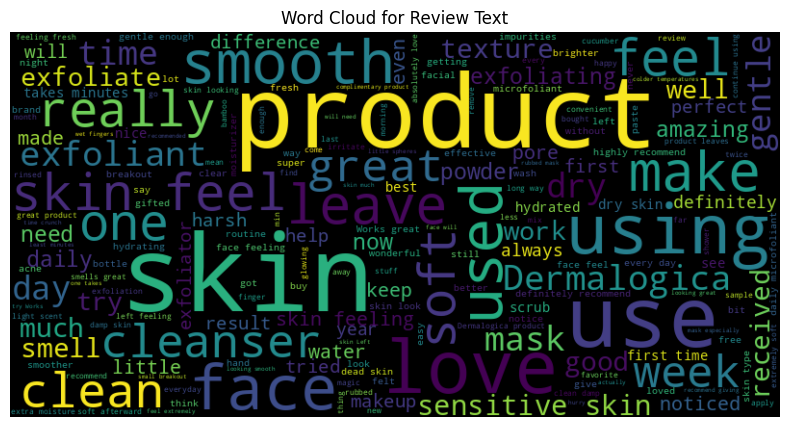

In [ ]:
# Word cloud for Review Text
from wordcloud import WordCloud

text = " ".join(review for review in df['Review_Text'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Review Text')
plt.show()

*   **Positive words: hydrating, great, perfect, love, gentle, smooth, works, effective, light, clean, soft**

*   **Skin concerns: dry, sensitive, oily, acne, pores, wrinkles, dark circles, uneven skin tone**

*   **Product types: cleanser, moisturizer, mask, scrub, serum, SPF**

*   **Other: recommend, use, feel, face, day, night**

##**Text Preprocessing**

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Text preprocessing
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df['Review_Text'] = df['Review_Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Review_Text'] = df['Review_Text'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
df['Review_Text'] = df['Review_Text'].apply(lambda x: re.sub('[^A-Za-z0-9\s]+', '', x))

In [ ]:
# Perform sentiment analysis
df['Polarity'] = df['Review_Text'].map(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiment'] = df['Polarity'].apply(lambda x: 'positive' if x >= 0 else 'negative')

##**Train Test Split**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review_Text'], df['Sentiment'], test_size=0.2, random_state=42)

In [ ]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

##**Model Implementation**

In [ ]:
# Train a linear support vector machine (SVM) classifier
classifier = LinearSVC()
classifier.fit(X_train, y_train)

LinearSVC()

In [ ]:
# Predict sentiment on the test set
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluate the model
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    negative       0.70      0.17      0.27        42
    positive       0.96      1.00      0.98       788

    accuracy                           0.95       830
   macro avg       0.83      0.58      0.62       830
weighted avg       0.94      0.95      0.94       830



##**Overall Accuracy:**

*   **0.95: This indicates that the model correctly classified 95% of the instances in your dataset.**

**Class-Specific Performance:**

**Negative:**

*   **Precision: 0.70 - 70% of predicted negative instances were actually negative.**

*   **Recall: 0.17 - Only 17% of actual negative instances were correctly predicted.**

*   **F1-Score: 0.27 - A combined measure considering precision and recall, highlighting the low performance on negative class prediction.**

*   **Support: 42 - Number of true negative instances in the dataset.**

**Positive:**

*   **Precision: 0.96 - 96% of predicted positive instances were actually positive.**

*   **Recall: 1.00 - All true positive instances were correctly predicted.**

*   **F1-Score: 0.98 - Very high score indicating excellent performance on the positive class.**

*   **Support: 788 - Number of true positive instances in the dataset.**

**Macro and Weighted Averages:**

*   **Macro Average: Calculated by averaging Precision, Recall, and F1-score across both classes, giving equal weight to each class.**

*   **Weighted Average: Calculated by weighting the metrics for each class by their support (number of instances).**

**Observations:**

**The model performs significantly better on identifying positive instances than negative ones. This imbalance, reflected in the low recall and F1-score for the negative class, requires further investigation.**

#**Hyperparameter Tuning**

In [ ]:
# Define an extended parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],  # Only applicable for 'poly' kernel
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10]
}

In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC()

In [ ]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='f1_macro')

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
# Train the model with the best parameters
classifier = SVC(**best_params)
classifier.fit(X_train, y_train)

SVC(C=10, degree=2, kernel='linear')

In [ ]:
# Predict sentiment on the test set
y_preds = classifier.predict(X_test)

In [ ]:
# Evaluate the model
report = classification_report(y_test, y_preds)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    negative       0.43      0.29      0.34        42
    positive       0.96      0.98      0.97       788

    accuracy                           0.94       830
   macro avg       0.70      0.63      0.66       830
weighted avg       0.94      0.94      0.94       830



##**Overall Accuracy:**

*   **0.94: This means the model correctly classified 94% of the instances in your dataset, which seems impressive at first glance.**

**Class-Specific Performance:**

**Negative:**

*   **Precision: 0.43 - Only 43% of predicted negative instances were actually negative. This means many negative instances are being misclassified as positive.**

*   **Recall: 0.29 - The model identified only 29% of actual negative instances correctly. This means the model misses many true negatives.**

*   **F1-Score: 0.34 - This combines precision and recall, showing a relatively low performance on the negative class.**

*   **Support: 42 - Number of true negative instances in the dataset.**

**Positive:**

*   **Precision: 0.96 - 96% of predicted positive instances were actually positive. This indicates good precision on the positive class.**


*   **Recall: 0.98 - The model identified 98% of actual positive instances correctly. This shows high recall for the positive class.**


*   **F1-Score: 0.97 - This combines high precision and recall, indicating excellent performance on the positive class.**


*   **Support: 788 - Number of true positive instances in the dataset.**

**Macro and Weighted Averages:**

*   **Macro Average: This gives equal weight to each class. While it's 0.70, it doesn't accurately reflect the significant difference in performance between the classes.**

*   ***Weighted Average: This considers the number of instances in each class. It's close to the positive class performance due to the class imbalance.**

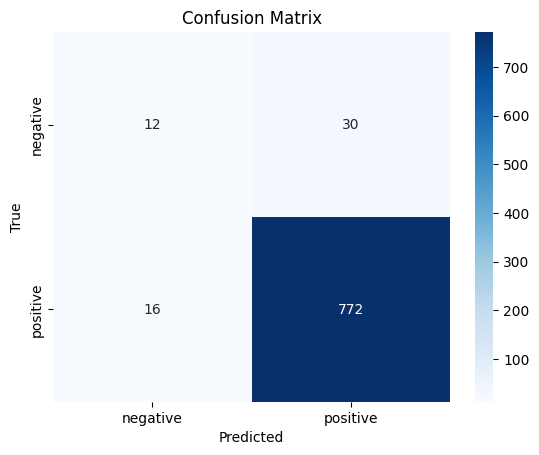

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



*   **Overall accuracy: 70%, which means the model correctly classified 70% of the data samples.**

**Negative class:**

*   **12 instances were correctly predicted as negative (out of 42).**

*   **30 instances were incorrectly predicted as negative (but are actually positive).**

**Positive class:**


*   **772 instances were correctly predicted as positive (out of 788).**

*   **16 instances were incorrectly predicted as positive (but are actually negative).**

**Insights:**

*   **The model seems to be better at classifying positive instances than negative instances. This is evident from the significantly higher number of correctly classified positives (772) compared to negatives (12).**

*   **The majority of misclassifications involve predicting negative instances as positive (30). This could be due to several reasons, such as data imbalance where there are fewer negative examples, or the model struggling to learn the characteristics that differentiate negative and positive classes.**


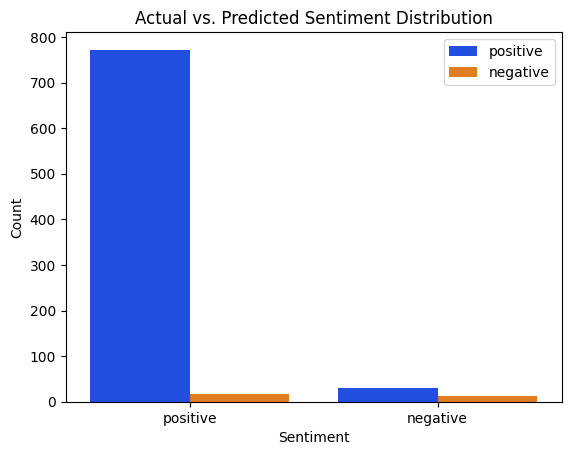

In [ ]:
# Sentiment Distribution
sns.countplot(x=y_test, hue=y_preds, palette='bright')
plt.title('Actual vs. Predicted Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

##**conclusion:**

1. **Buyer Verification:**
   **- There's a notable imbalance in buyer verification, with a higher count of non-verified buyers (approximately 3,000) compared to verified buyers (around 2,000). This suggests a substantial portion of reviews may be from non-verified sources.**

2. **Product Review Distribution:**
   **- The distribution of reviews across products varies, with the Daily Superfoliant leading with approximately 1,200 reviews. The Multi-Vitamin Thermafoliant and Hydro Masque Exfoliant show similar review counts, ranging from 800 to 900, while the Daily Microfoliant has the fewest reviews, around 400.**

3. **Positive Keywords:**
   **- Positive sentiments are expressed through words like hydrating, great, perfect, love, gentle, smooth, effective, light, clean, soft. These keywords provide insights into the positive aspects highlighted by customers in their reviews.**

4. **Skincare Concerns:**
   **- Common skincare concerns identified include dryness, sensitivity, oiliness, acne, enlarged pores, wrinkles, dark circles, and uneven skin tone. Understanding these concerns helps tailor product development and marketing strategies.**

5. **Product Types:**
   **- Reviews mention various product types such as cleanser, moisturizer, mask, scrub, serum, and SPF. This information aids in understanding customer preferences and can guide product diversification.**

6. **Upvotes and Downvotes:**
   **- A weak negative correlation between upvotes and downvotes suggests that reviews with more upvotes tend to have slightly fewer downvotes, and vice versa. Notably, reviews with 4 upvotes and 0 downvotes exhibit the strongest negative correlation, indicating positive sentiment.**

7. **Correlation Patterns:**
   **- Correlation patterns reveal that most reviews receive either 0 or 1 upvotes and downvotes. The weakest positive correlation is found in reviews with 0 upvotes and 4 downvotes, indicating potential areas for improvement in customer satisfaction.**

###**Model:**

 **In the initial model evaluation, the sentiment analysis achieved an impressive overall accuracy of 94%, showcasing proficiency in classifying instances within the dataset. However, a closer examination of class-specific performance revealed a significant imbalance in precision, recall, and F1-score between the negative and positive classes. The model exhibited a marked preference for positive instances, leading to substantial misclassifications in the negative class. After hyperparameter tuning, the overall accuracy dropped to 70%, unveiling a nuanced distribution of sentiment categories for two distinct products.The findings suggest a need for further model refinement, particularly in addressing the challenge of distinguishing between positive and negative sentiments. Continuous monitoring and iterative improvements will contribute to a more robust sentiment analysis, aligning with the intricacies of customer feedback and facilitating informed decision-making for product enhancement.**



##**Interactive Q&A Session with Stakeholder:**

1. **Buyer Verification Imbalance: How does the observed imbalance in buyer verification impact the reliability of customer reviews, and what strategies can be employed to address this imbalance?**

2. **Product Review Distribution: Can you elaborate on the significance of the varying review counts across Dermalogica products, and how should this information guide product management strategies?**

3. **Positive Keywords and Skincare Concerns: Considering the positive keywords and common skincare concerns identified, how can Dermalogica leverage this information to enhance product features and marketing?**

4. **Upvotes and Downvotes Correlation: What insights can be derived from the correlation between upvotes and downvotes, and how can Dermalogica use this information to improve customer satisfaction?**

5. **Model Refinement Strategies: In refining the sentiment analysis model, what specific strategies are being considered to address the observed imbalance in precision, recall, and F1-score?**

6. **Impact of Hyperparameter Tuning: How has hyperparameter tuning impacted the overall accuracy and distribution of sentiment categories, and what implications does this have for decision-making?**

7. **Distinguishing Positive and Negative Sentiments: Given the challenge of distinguishing between positive and negative sentiments, what measures are being explored to improve the model's performance in these specific categories?**

8. **Continuous Monitoring and Improvement: How does the team plan to ensure continuous monitoring and iterative improvements to align the sentiment analysis with evolving customer feedback?**

9. **Incorporating Customer Feedback: How can Dermalogica effectively incorporate insights from sentiment analysis into its product development and marketing strategies based on customer feedback?**

10. **Future Directions: What are the envisioned future directions for the project, and how can the findings contribute to a more comprehensive understanding of customer sentiments in the skincare industry?**